**Laboratorio Tratamiento de Señales III** *Práctica* 02

**Normalización y Estandarización de Señales**

*   Mateo Muñoz Arroyave
CC 1036676919

*   David Esteban Londoño Patiño
CC 1020465536



**Docentes:**

*   Hernán Felipe García Arias, PhD.
*   Pablo Alejandro Alvarado Duran, PhD.

**Facultad de Ingeniería**

**Universidad de Antioquia**

# Solución Laboratorio No. 02 Tratamiento de Señales 3 2023-2

## **Introducción**

- Algunos algoritmos de tratamiento de señales presentan mejor rendimiento si los datos tienen determinada escala o distribución constante.

- La **normalización** y la **estandarización** son dos técnicas que se pueden utilizar para escalar de forma consistente los datos de series temporales.

En esta práctica de laboratorio, descubriremos cómo podemos aplicar la normalización y estandarización a datos de series temporales en Python.

## **Objetivos de Aprendizaje:**

- Evidenciar las limitaciones de la normalización, y estandarización.

- Entender qué parámetros se requieren y cómo calcular manualmente los valores normalizados y estandarizados.

- Aplicar la librería de Python `scikit-learn` para normalizar y estandarizar sus datos de series temporales.

## **Desarrollo de la Práctica**

## Normalizar datos
Un dato normalizado $z_i$ se puede calcular como

$$ z_i = \frac{x_i - \text{min}(\textbf{x})}{ \text{max}(\textbf{x}) - \text{min}(\textbf{x})},$$

donde los valores *mínimo* y *máximo* pertenecen a la señal o vector de datos $\textbf{x} = [x_1, x_2, x_3, \cdots, x_i, \cdots, x_N]$.

- En la normalización, los datos se escalan de manera que estén dentro del rango entre 0 y 1.

- La normalización puede ser útil e incluso requerida en algunos algoritmos de aprendizaje de máquina:

  - k-vecinos más cercanos (usa cálculos de distancia),
  - regresión lineal y redes neuronales artificiales.

- Además, la normalización requiere los valores mínimos y máximos de las señales a procesar.

- Si los datos tienen una tendencia ascendente o descendente, la normalización puede no ser el mejor método.

## Estandarizar datos

Un valor estandarizado tiene la forma

$$ z_i = \frac{x_i - \mu}{\sigma} $$

Donde $\mu$ es la media, y $\sigma$ es la desviación estándar del vector de datos $\textbf{x}$, respectivamente

- La estandarización implica escalar los datos de manera que su media sea $\mu = 0$, y la desviación estándar sea $\sigma = 1$.

- Esto se puede considerar como centrar los datos, o eliminar el nivel DC de una señal.

- Necesaria en algunos algoritmos de aprendizaje de máquina, cuando los datos de series temporales tienen valores de entrada con diferentes escalas. (Ejemplo: sensores reloj inteligente).

- La estandarización supone que las observaciones se ajustan a una distribución Gaussiana (campana).

- En la práctica la mayoría de algoritmos como máquinas de vectores de soporte, regresión lineal y logística, y otros mejoran el rendimiento con datos estandarizados (*Z-Score*).

- Requiere el cálculo de la media y la desviación estándar de los valores observados.


## **Caso de estudio:** temperaturas mínimas diarias

Esta base de datos contiene las temperaturas mínimas diarias durante 10 años (1981-1990) en la ciudad de Melbourne, Australia. Las unidades están en grados Celsius.

Cargamos los datos en el área de trabajo

### **Procedimiento**

1. Implemente dos funciones en Python, una que normalice y otra que estandarice un vector de entrada $\textbf{x}$.

2. Aplique las dos funciones anteriores a los datos de temperatura y visualice los resultados, de la siguiente manera:

  - Grafique, usando subplots (3 filas x 1 columna), los datos de entrada, así como su correspondiente normalización y estandarización.
  - Muestre en una sola gráfica los histogramas de los tres tipos de datos.

  Describa los resultados.

3. **Investige** cómo usar la librería de tratamiento de datos `scikit-learn`, para normalizar la base de datos  utilizando el objeto `MinMaxScaler`.

4. Así mismo, utilice el objeto `StandardScaler` de la librería `scikit-learn` para estandarizar los datos.

5. Compare los resultados con los obtenidos con las funciones implementadas en el punto 1.



## **Procedimiento**

Inicialmente realizamos la carga de los datos al espacio de trabajo.

In [ ]:
!wget 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv' -O 'daily-minimum-temperatures-in-me.csv'

--2023-08-22 23:50:58--  https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 67921 (66K) [text/plain]
Saving to: ‘daily-minimum-temperatures-in-me.csv’

daily-minimum-tempe 100%[===================>]  66.33K  --.-KB/s    in 0.02s   

2023-08-22 23:50:58 (4.17 MB/s) - ‘daily-minimum-temperatures-in-me.csv’ saved [67921/67921]



Se procede con la carga de librerías necesarías para el desarrollo de la práctica.

In [ ]:
import seaborn as sns
from pandas import read_csv
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler

Se procede con la extracción de la información en un vector de datos, se visualiza la información, de la gráfica puede observarse un comportamiento periodico en el tipo de información, esto obecede a que en ciertas epocas del año la temperatura mantiene cierto rango a otras epocas, por ejemplo, existe una diferencia entre invierno o verano.

            Temp
Date            
1981-01-01  20.7
1981-01-02  17.9
1981-01-03  18.8
1981-01-04  14.6
1981-01-05  15.8


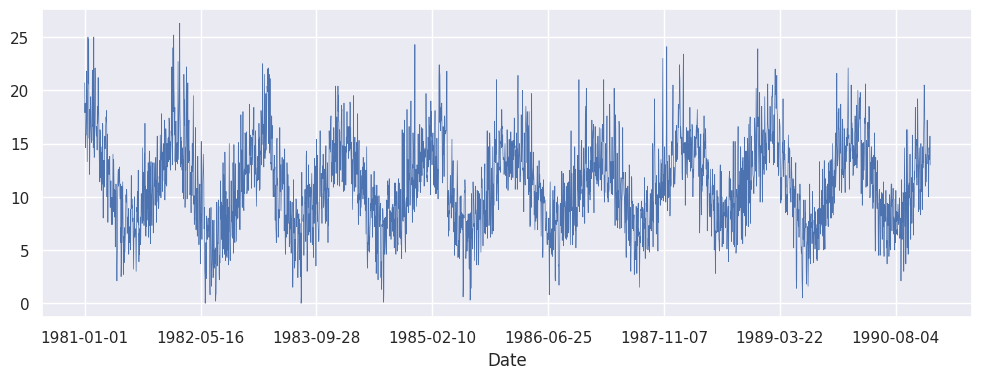

In [ ]:
series = read_csv('daily-minimum-temperatures-in-me.csv',
                  header=0, index_col=0)

print(series.head()) # observar primeros 5 datos
sns.set(rc={'figure.figsize':(12, 4)})
series['Temp'].plot(linewidth=0.5); # graficar todos los datos

Consultamos el número de datos que tenemos en nuestro set de pruebas.

In [ ]:
datos=np.array(series.loc[:,'Temp'])
print(datos[:])
print("El número de datos es:", len(datos))

[20.7 17.9 18.8 ... 13.5 15.7 13. ]
El número de datos es: 3650


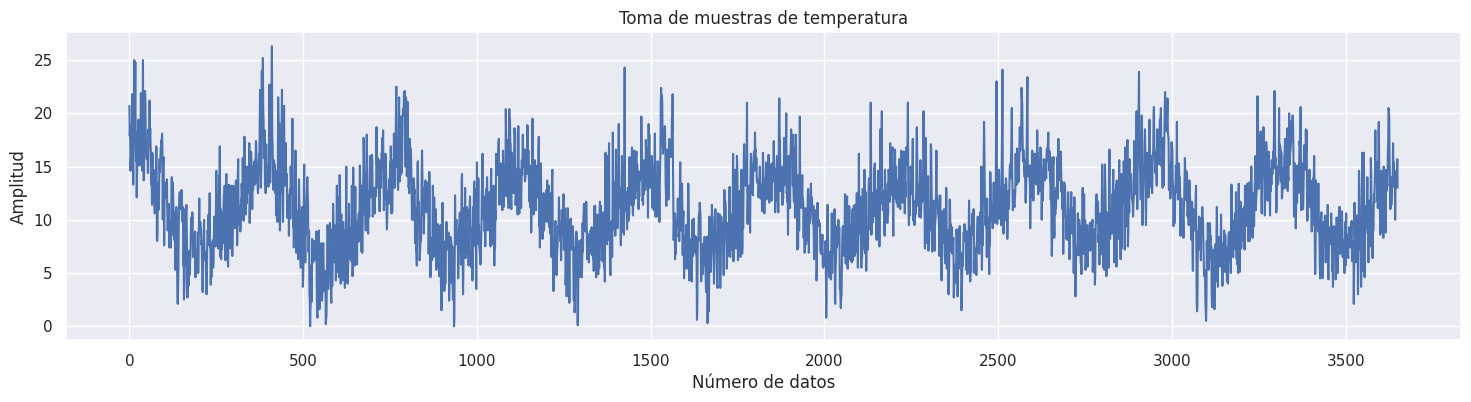

In [ ]:
plt.figure(figsize=(18,4))
plt.plot(datos)
plt.title("Toma de muestras de temperatura")
plt.xlabel("Número de datos")
plt.ylabel("Amplitud")
plt.show()

## Función para graficar

In [ ]:
def subplot_lab(Tamano,Posicion,senal,title,xlabel,ylabel,colsize,rowsize,colorx):
    Sxi = plt.subplot2grid(Tamano, Posicion, colspan=colsize,rowspan=rowsize)
    Sxi = plt.plot(senal, color = colorx)                           # Dibujar la gráfica
    Sxi = plt.title(title,fontsize=18)                                # Titulo de la gráfica
    Sxi = plt.xlabel(xlabel,fontsize=12)                              # Etiqueta eje X
    Sxi = plt.ylabel(ylabel,fontsize=12)                              # Etiqueta eje Y

## Función para normalizar

In [ ]:
def normalizar(datos):
    minimo = np.min(datos)
    maximo = np.max(datos)

    print("El dato minimo es: ", minimo)
    print("El dato máximo es: ", maximo)

    datos_normalizados = (datos - minimo) / (maximo - minimo)                                   # Resta de la media

    print("Datos Normalizados: ", datos_normalizados)

    return datos_normalizados

## Función para estandarizar

In [ ]:
def estandarizar(datos):
    media = np.mean(datos)
    sigma = np.std(datos)

    print("La media es: ", media)
    print("La desviación estándar es: ", sigma)

    datos_estandarizados = (datos - media) / sigma

    print("Datos Estandarizados: ", datos_estandarizados)

    return datos_estandarizados

#Punto 2.
###Aplicación de las funciones a los datos de temperaturas

Las funciones construidas retornan el dato minimo y el dato máximo, los cuales se usarán para el proceso de normalización, así como la maedia y la desviación estándar, lo cual nos funcionará para estandarizar la señal.

In [ ]:
datos_normalizados = normalizar(datos)
datos_estandarizados = estandarizar(datos)

El dato minimo es:  0.0
El dato máximo es:  26.3
Datos Normalizados:  [0.78707224 0.68060837 0.7148289  ... 0.51330798 0.59695817 0.49429658]
La media es:  11.177753424657535
La desviación estándar es:  4.071279075310806
Datos Estandarizados:  [2.33888328 1.65113873 1.87219948 ... 0.5703973  1.11076801 0.44758577]


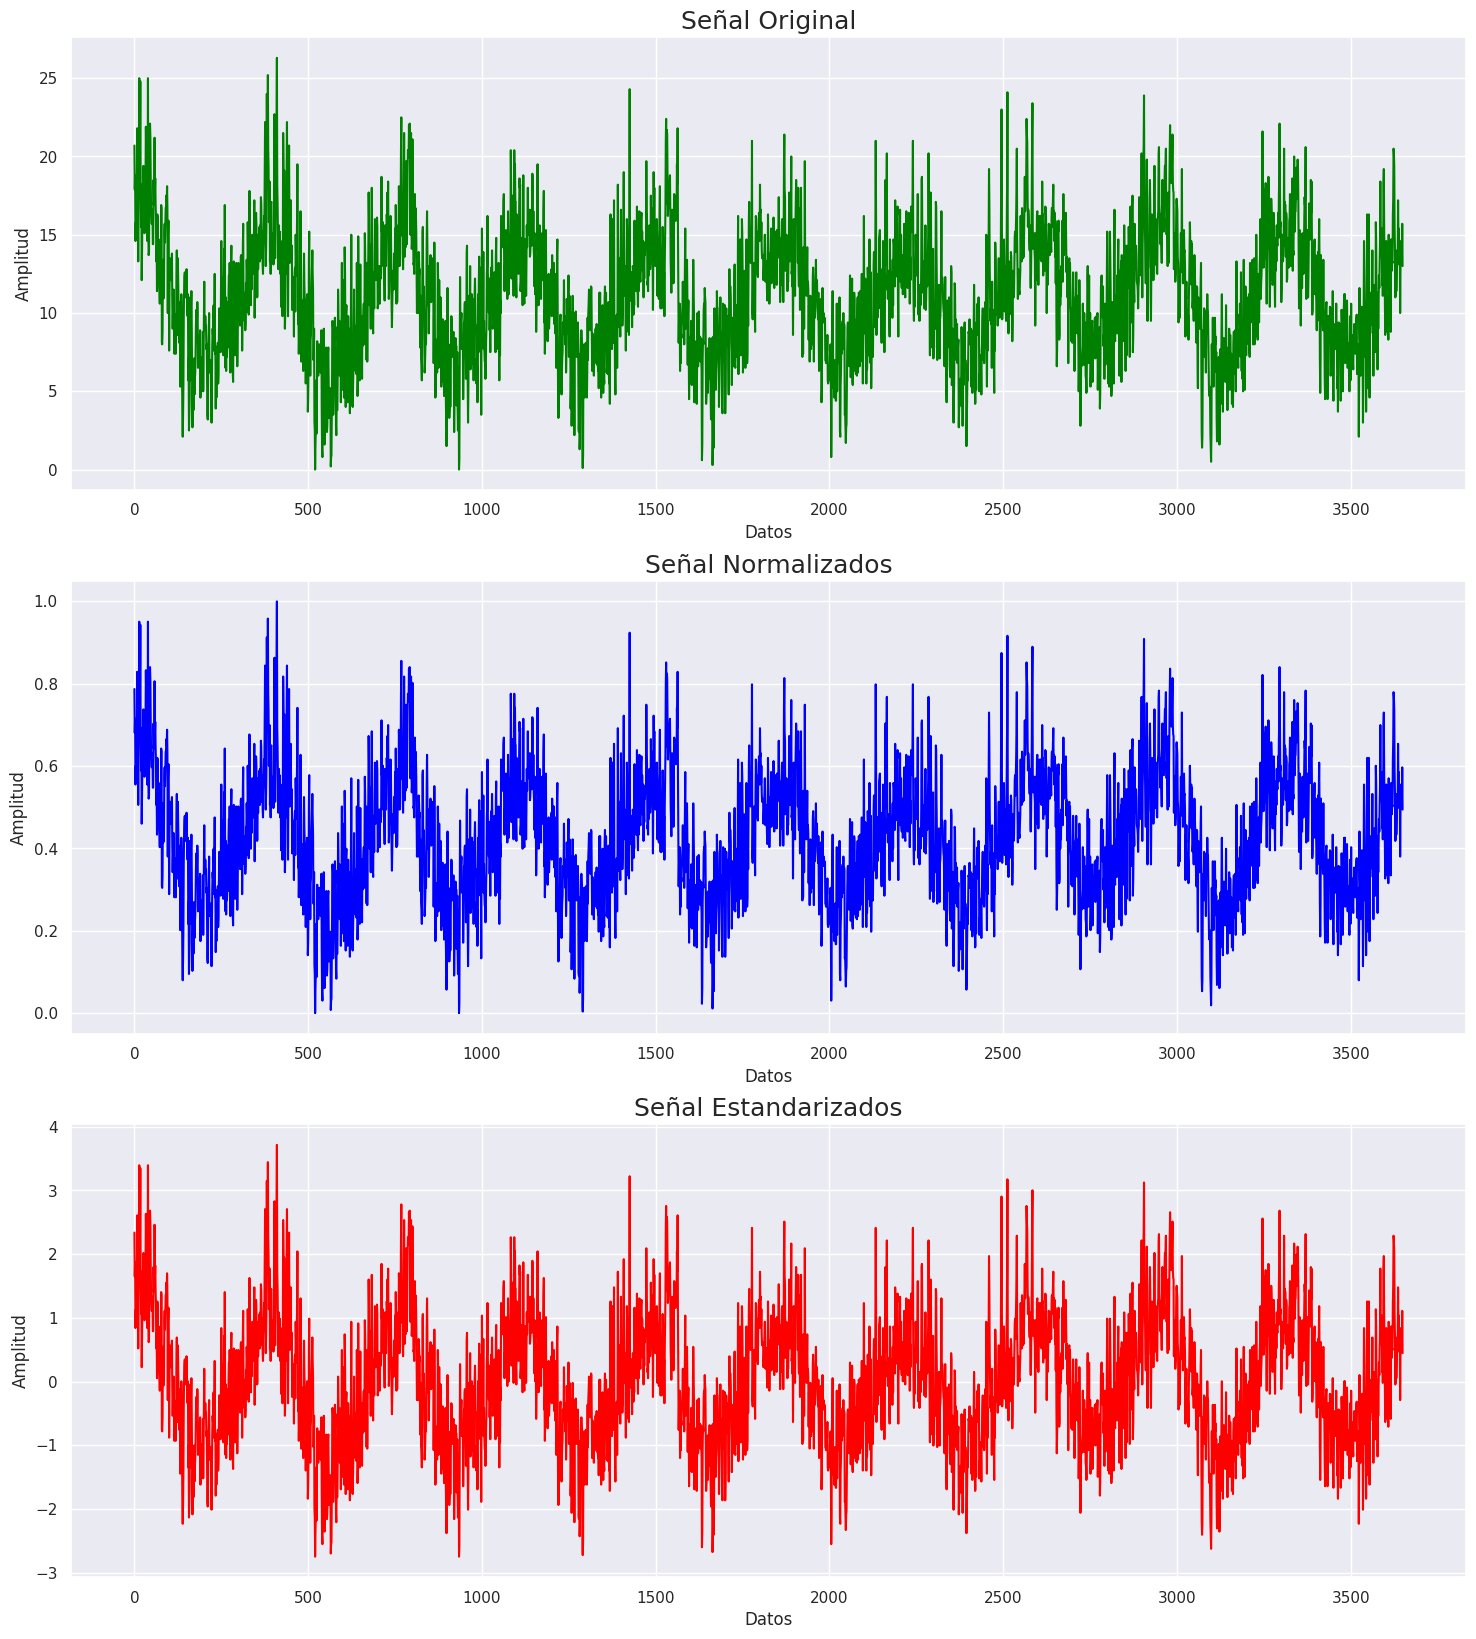

In [ ]:
plt.figure(figsize=(18,20))

subplot_lab((3,1),(0,0),datos ,'Señal Original','Datos','Amplitud',1,1,'green')
subplot_lab((3,1),(1,0),datos_normalizados ,'Señal Normalizados','Datos','Amplitud',1,1,'blue')
subplot_lab((3,1),(2,0),datos_estandarizados ,'Señal Estandarizados','Datos','Amplitud',1,1,'red')

plt.show()

De las 3 gráficas podemos validar, inicialmente para la gráfica normalizada, que su rango de amplitudes oscila entre 0 y 1, lo cual es el objetivo de la normalización, todos los datos, sin importar sus amplitudes ahora se encontrarán dentro de este rango.

Ahora para el proceso de estandarización, podemos validar que su media se encuentra centralizada en el Origen, en 0, una de las caracteristicas de la estandarización de datos.

## Histograma de los tres tipos de datos

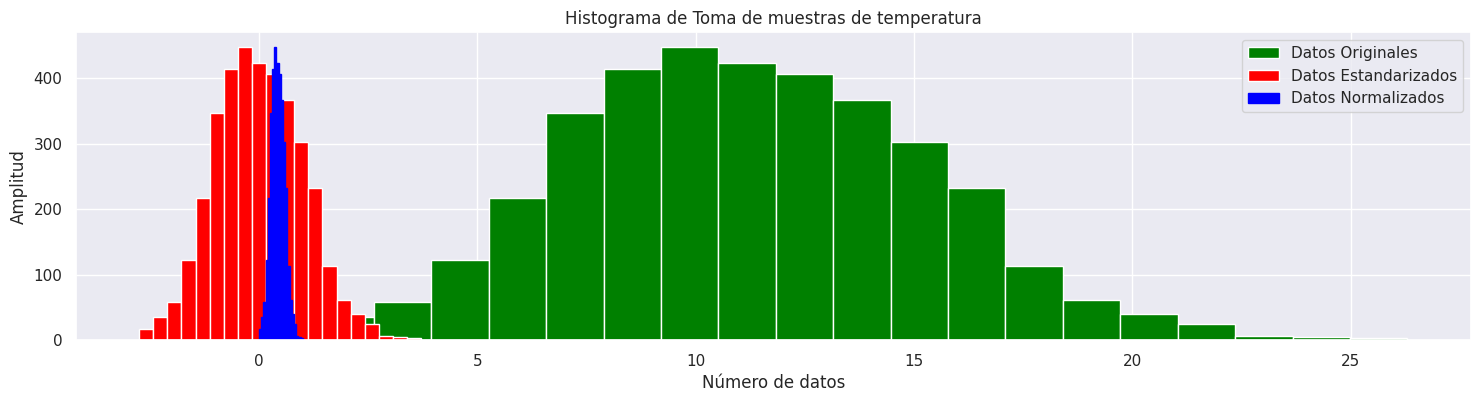

In [ ]:
plt.figure(figsize=(18,4))
plt.hist(datos, bins=20 , color = 'green', label = 'Datos Originales')
plt.hist(datos_estandarizados, bins=20 , color = 'red', label = 'Datos Estandarizados')
plt.hist(datos_normalizados, bins=20 , color = 'blue', edgecolor='blue', label = 'Datos Normalizados')
plt.title("Histograma de Toma de muestras de temperatura")
plt.xlabel("Número de datos")
plt.ylabel("Amplitud")
plt.legend()
plt.show()

In [ ]:
media_est = np.mean(datos_estandarizados)
sigma_est = np.std(datos_estandarizados)

print("La media de la señal Estandarizadaes: ", media_est)
print("La desviación estándar de la Señal Estandarizada es: ", sigma_est)

La media de la señal Estandarizadaes:  -1.6546885627290005e-16
La desviación estándar de la Señal Estandarizada es:  1.0


En el histograma, se muestran los datos de temperaturas originales en color verde, abarcando un rango de 0 a 25. En esa misma gráfica, se visualizan los datos estandarizados de color rojo con una media de 0 y los normalizados de color azul que varían entre 0 y 1. Aunque todos presentan la misma amplitud, se pueden ver que estan graficados dependiendo de su caracteristica, ya sea estandarizados o normalizados.

Tras analizar el histograma podemos observar un comportamiento de tipo Gaussiano para este fenomeno fisico, o meteorológico, se puede entonces concluir que los rangos de temperatura más comúnes oscilan aproximadamente entre 8 y 12, tendiendo picos de temperaturas exporádicos en ciertas ocasiones.

# Punto 3

In [ ]:
scaler = MinMaxScaler()
datos_normalizados_lib = scaler.fit_transform(datos.reshape(-1, 1))

print("Datos Normalizados: ", datos_normalizados_lib)

Datos Normalizados:  [[0.78707224]
 [0.68060837]
 [0.7148289 ]
 ...
 [0.51330798]
 [0.59695817]
 [0.49429658]]


In [ ]:
standardScaler = StandardScaler()
datos_estandarizados_lib = standardScaler.fit_transform(datos.reshape(-1, 1))

print("Datos Estandarizados: ", datos_estandarizados_lib)

Datos Estandarizados:  [[2.33888328]
 [1.65113873]
 [1.87219948]
 ...
 [0.5703973 ]
 [1.11076801]
 [0.44758577]]


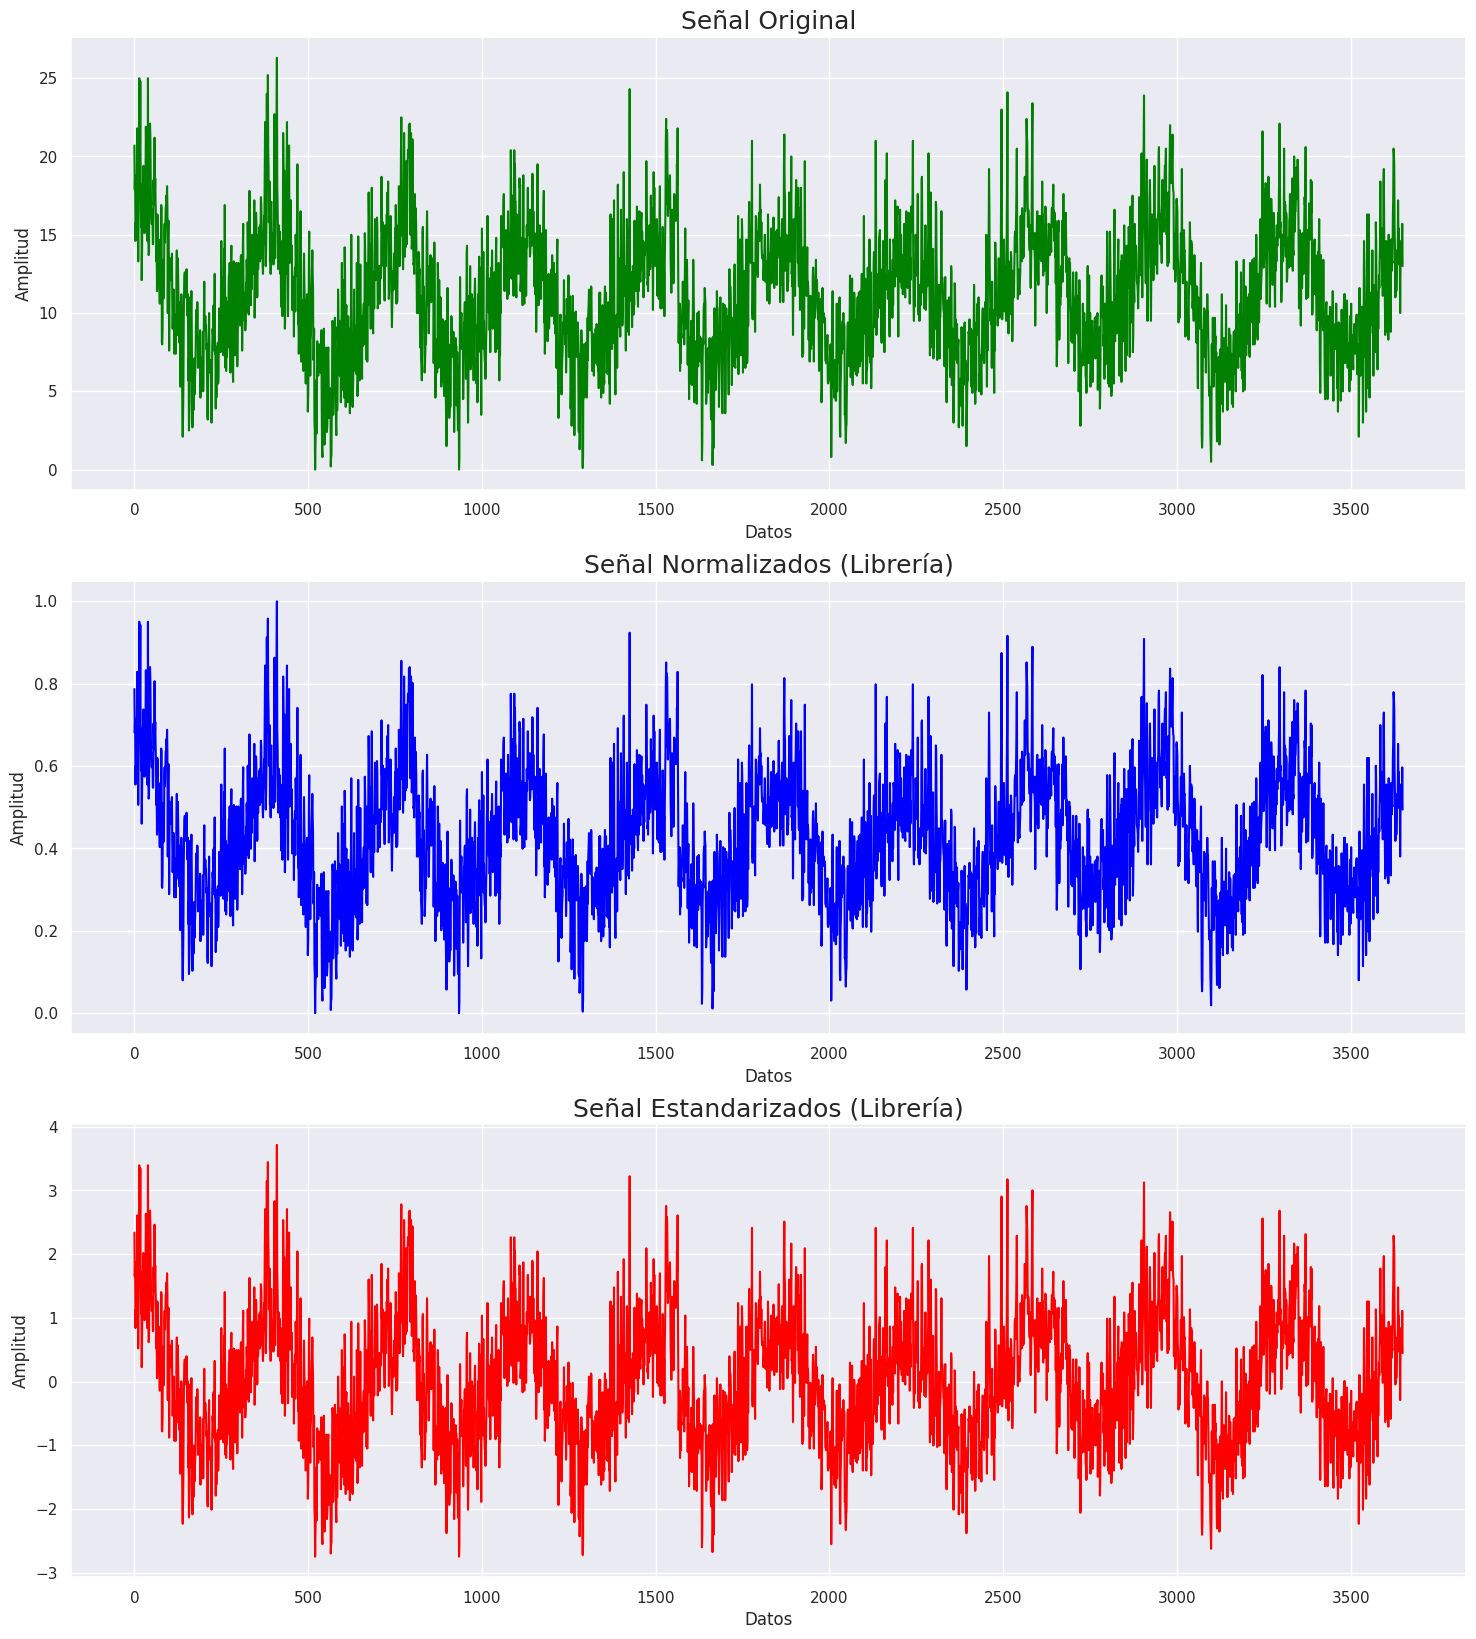

In [ ]:
plt.figure(figsize=(18,20))

subplot_lab((3,1),(0,0),datos ,'Señal Original','Datos','Amplitud',1,1,'green')
subplot_lab((3,1),(1,0),datos_normalizados_lib ,'Señal Normalizados (Librería)','Datos','Amplitud',1,1,'blue')
subplot_lab((3,1),(2,0),datos_estandarizados_lib ,'Señal Estandarizados (Librería)','Datos','Amplitud',1,1,'red')

plt.show()

La libreria usada tras el estudio de su implementación, nos corrobora los resultados obtenidos de las funciones creadas anterioemente, y nos muestra las graficas con los mismos resultados analizados previamente.

## **Caso de estudio:** escalar datos multivariados

- La base de datos [Iris](https://es.wikipedia.org/wiki/Conjunto_de_datos_flor_iris) es un estándar en el estudio de tratamiento de señales y aprendizaje de máquina.

- Esta base de datos multivariada contiene muestras de tres especies de flor Iris ( setosa, virginica, versicolor), donde se miden (en cm) cuatro rasgos de cada muestra: largo y ancho del sépalo y pétalos.

In [ ]:
from sklearn.datasets import load_iris
from sklearn import preprocessing
# load the Iris dataset
iris = load_iris()
# separate the data and target attributes
X = iris.data
y = iris.target
# standardize the data attributes
standardized_X = preprocessing.scale(X)

print('Original data:\n\n',standardized_X[:5,:])

print('\nstandardized data after transformation:\n\n',standardized_X[:5,:])

standardized data after transformation:

 [[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]]


A continuación se muestra el gráfico de cajas de cada característica de la base de datos:
- ancho sépalo
- largo sépalo
- ancho pétalo
- largo pétalo

Text(0.5, 1.0, 'Datos originales')

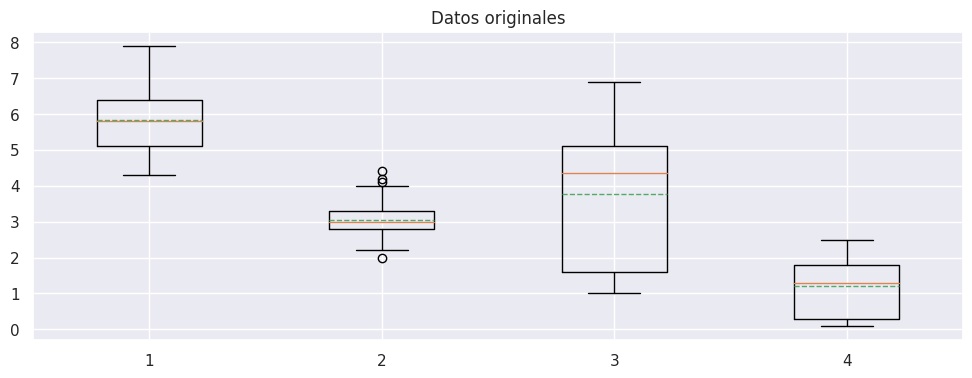

In [ ]:
import matplotlib.pyplot as plt
plt.boxplot(X, showmeans = True, meanline = True)
plt.title("Datos originales")

### **Procedimiento**

1. Describa los resultados obtenidos en la gráfica de caja de los datos puros.

2. Muestre las gráficas de caja para los datos normalizados, y luego para los datos estandarizados.

3. Qué conclusiones puede sacar al observar y comparar las tres gráficas anteriores?

## 1.
En los resultados originales de las gráficas de cajas se pueden determinar dónde están las concentraciones de los datos o la sobrepoblación de los datos, las lineas discontinuas verdes hacen referencia a la media de los datos y las lineas naranjas son la mediana. Las lineas en los limites hacen referencia a los datos en los limites de cada señal equivalente donde estan el mayor y menor dato. Los cuadrados representan a la mayor concentración de datos.

Text(0.5, 1.0, 'Datos Estandarizados')

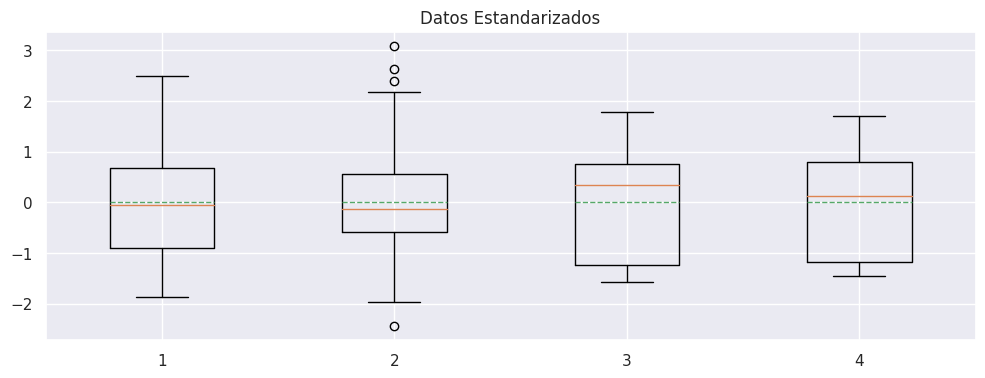

In [ ]:
plt.boxplot(standardized_X, showmeans = True, meanline = True)
plt.title("Datos Estandarizados")


normalize data after transformation:

 [[0.22222222 0.625      0.06779661 0.04166667]
 [0.16666667 0.41666667 0.06779661 0.04166667]
 [0.11111111 0.5        0.05084746 0.04166667]
 [0.08333333 0.45833333 0.08474576 0.04166667]
 [0.19444444 0.66666667 0.06779661 0.04166667]]


Text(0.5, 1.0, 'Datos Normalizados')

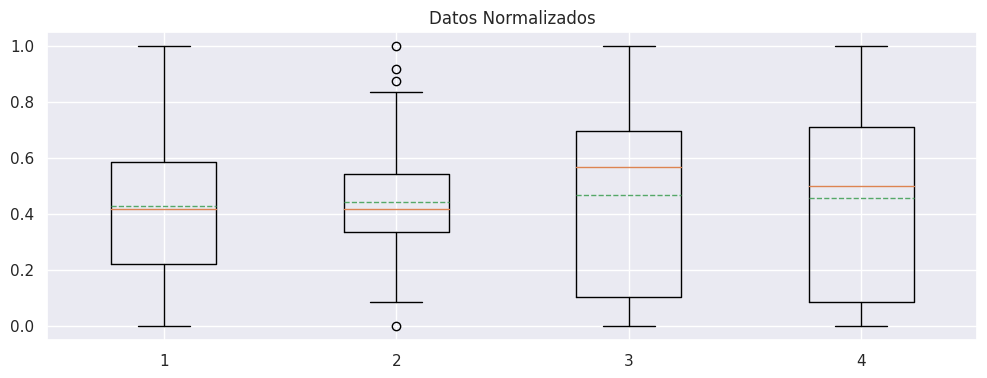

In [ ]:
normalized_X = scaler.fit_transform(X)

print('\nnormalize data after transformation:\n\n',normalized_X[:5,:])

plt.boxplot(normalized_X, showmeans = True, meanline = True)
plt.title("Datos Normalizados")

## Conclusiones

En las tres graficas obtenidas se pueden apreciar la tendencia dependiendo de las caracteristicas, en los datos normalizados vemos como los datos varian de 0 a 1 donde su limite lo podemos ver en el 50% de las graficas y el otro 50% lo vemos en la caja donde se concentra la mayoria de datos, vemos como el ancho del sepalo es mayor al largo del sepalo y el ancho y largo del petalo son bastante similares, aunque en el ancho del petalo vemos como su media y mediana presentan cierta diferencia conn respecta a las demás características.


Es posible apreciar por simple observación, como en la gráfica de datos estandarizados, la media se mantiene en 0, siendo el primer punto de análisis para este tipo de prácticas.


Al observar los datos normalizados y estandarizados y realizando la comparación con los datos originales se puede apreciar la distribución de los mismos, notandose sobre todo en las caracteristicas del pétalo, donde en las gráficas originales se presenten inicialmente con niveles muy diferentes, pero tras realizar el análisis se puede observar cómo se encuentran distribuidos los datos, permitiendo otro tipo de análisis extra que la gráfica don datos originales no permite realizar.


Finalmente es posible apreciar que sin importar el tipo de procesamiento, de los trabajados en esta guía (Estandarización y Normalización), por ejemplo para el largo del sépalo, los valores atípicos, que por su porca frecuencia se muestran como circulos en el diagrama de cajas, permanecen en los tres tipos de representaciones.

## References
* Oppenheim, A. V., and A. S. Willsky. Signals and Systems Prentice-Hall, (1997)

* Proakis, John G. Digital signal processing: principles algorithms and applications Pearson Education India, 2001.

* https://medium.com/subex-ai-labs/normalization-vs-standardization-46a37f455fd5

* https://interactivechaos.com/es/manual/tutorial-de-machine-learning/minmaxscaler